In [457]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare,f,ttest_ind,f_oneway,ttest_1samp,chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from wordcloud import WordCloud


## Problem Statment

What are the key factors that influence employee attrition within your organization?

To achieve this, you need to explore the relationships between employee attrition and the other variables in the dataset. You might want to investigate questions like:

1- Are younger employees more likely to leave the company than older ones? 

2- Does the daily rate of pay impact attrition rates? 

3- Is there a relationship between the department an employee works in and their likelihood of leaving? 

4- Does the distance an employee lives from work affect attrition? 

5- Are there certain education fields that have higher attrition rates? 

6- How do factors like job satisfaction, work-life balance, and years of experience relate to attrition? 

Goal is to provide actionable insights to help the company reduce attrition and improve employee retention. You can use statistical analysis, data visualization, and machine learning techniques to uncover patterns and trends in the data that can guide HR policies and strategies."

In [458]:
HR_data = pd.read_csv("HR-Employee-Attrition.csv")
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Checking the information about dataset

In [459]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Data Insight
--> There are 1470 rows and 35 columns

--> datatyps 26 (int) and 9 (objects)

--> 0 Null Value

--> 0 Duplicates

In [460]:
HR_data.describe(include = "object").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [461]:
HR_data.describe(include = "int64")

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [462]:
check_duplicate = HR_data.duplicated().any()
check_duplicate

False

There are few columns that have do not have any effect on analysis, so we can remove them.

* Over18 = Y

* Employeenumber = that is employee ID

* EmployeeCount = that is FTE (Full Time Equivalent),

* StandardHours = 80


In [463]:
HR_data = HR_data.drop(["Over18","EmployeeNumber","EmployeeCount","StandardHours"],axis = 1)


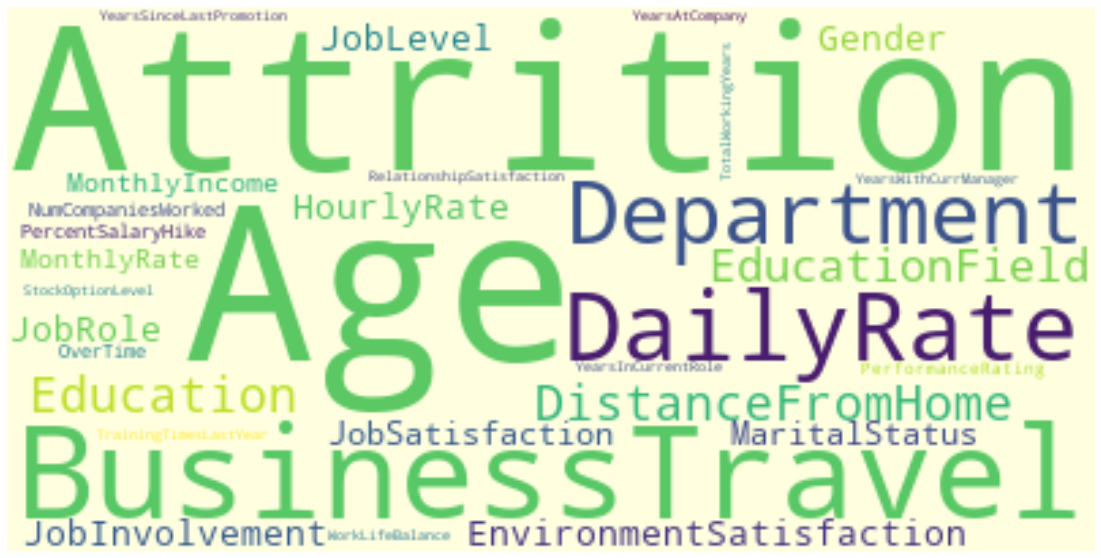

In [464]:
plt.subplots(figsize=(30,10))
column_names = HR_data.columns
text = ' '.join(column_names)
wordcloud = WordCloud(background_color = "lightyellow").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [465]:
cat = HR_data.select_dtypes(["object"]).columns 
num = HR_data.select_dtypes(["number"]).columns
print(cat)
print(num)


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [466]:
for i in cat:
    print("Unique Value -->",i, set(HR_data[i]))

Unique Value --> Attrition {'No', 'Yes'}
Unique Value --> BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
Unique Value --> Department {'Sales', 'Research & Development', 'Human Resources'}
Unique Value --> EducationField {'Other', 'Technical Degree', 'Marketing', 'Human Resources', 'Life Sciences', 'Medical'}
Unique Value --> Gender {'Male', 'Female'}
Unique Value --> JobRole {'Healthcare Representative', 'Manufacturing Director', 'Human Resources', 'Research Scientist', 'Manager', 'Sales Representative', 'Sales Executive', 'Research Director', 'Laboratory Technician'}
Unique Value --> MaritalStatus {'Single', 'Married', 'Divorced'}
Unique Value --> OverTime {'No', 'Yes'}


***Univariate analysis of categorical variable*** 

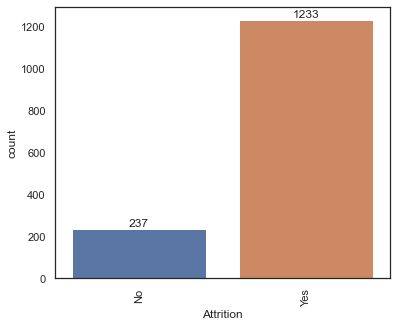

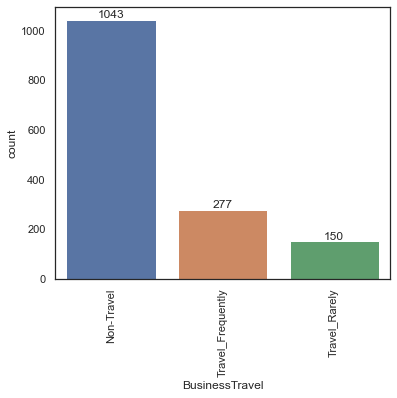

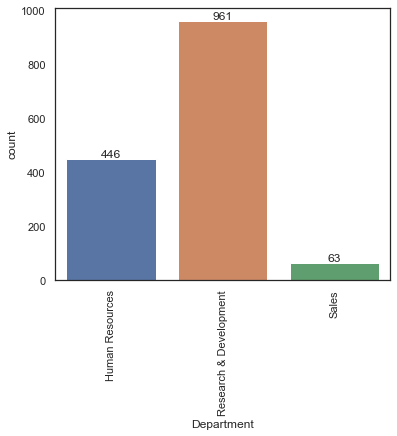

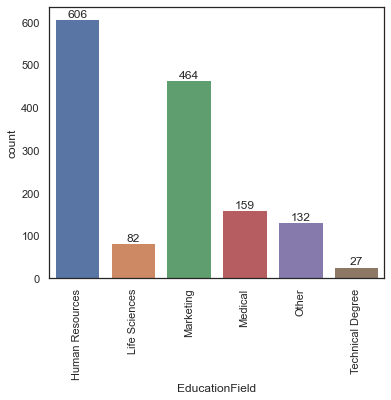

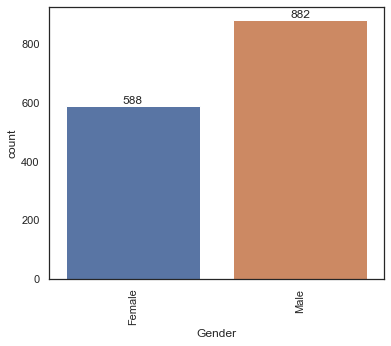

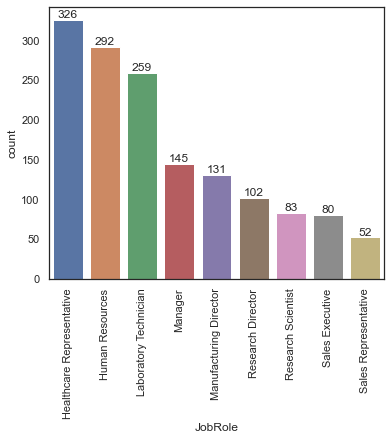

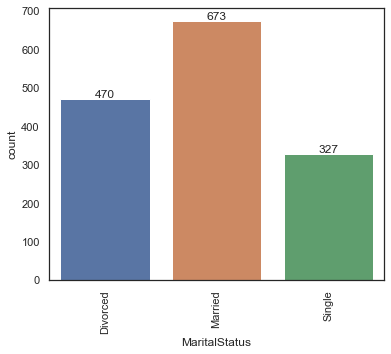

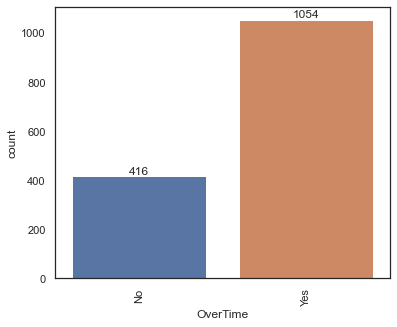

In [467]:
#sns.set_palette("pastel")
for i, col in enumerate (cat):
    fig, axes = plt.subplots(figsize=(6,5))
    plot = sns.countplot(data = HR_data, x=col)
    activities = [var for var in HR_data[col].value_counts().sort_index().index]
    plot.set_xticklabels(activities,rotation=90)
    for container in axes.containers:
        axes.bar_label(container)
plt.show()

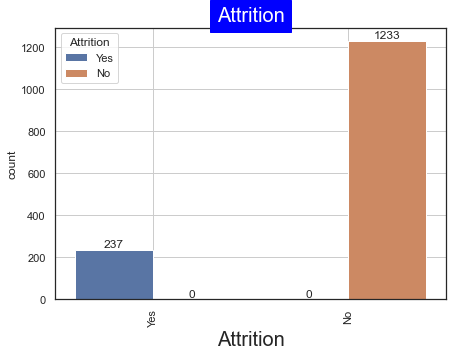

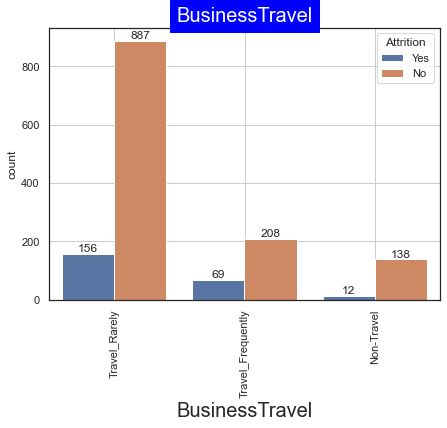

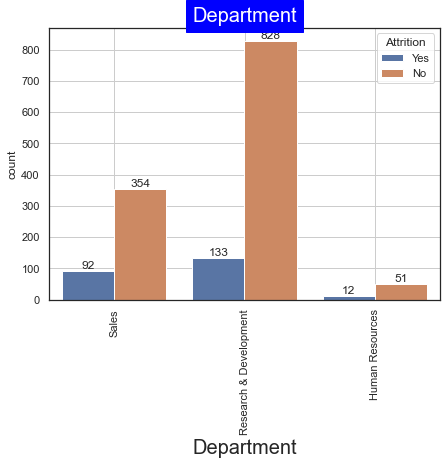

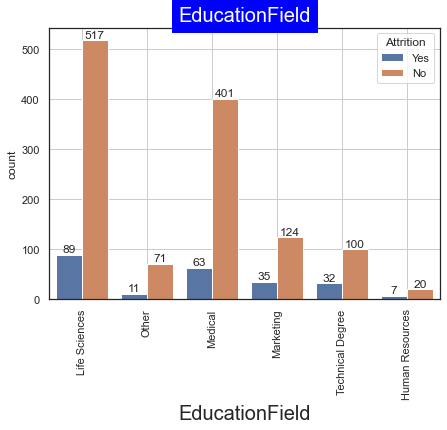

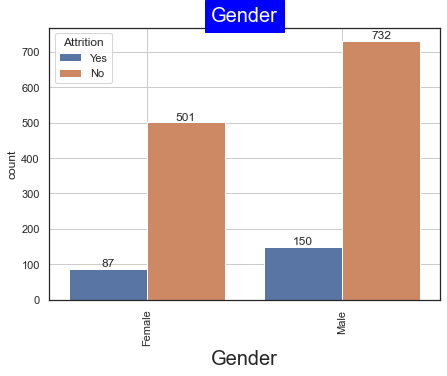

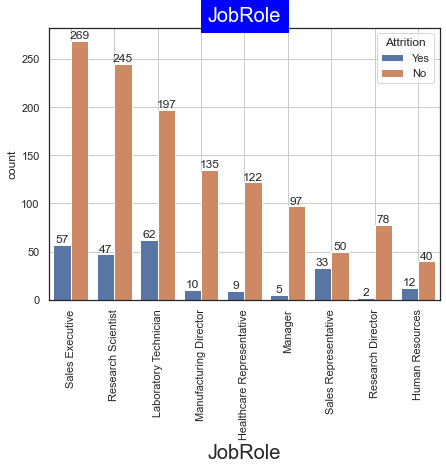

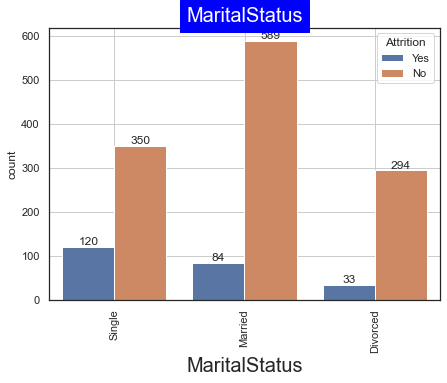

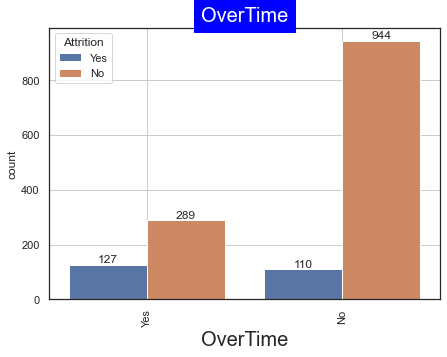

In [468]:
for column in cat:
    plt.figure(figsize =(7,5))
    
    plot=sns.countplot(x= HR_data[column],data= HR_data,hue="Attrition")
    for container in plot.containers:
        plot.bar_label(container)  
        
        
    plt.title(column,backgroundcolor='Blue',color='White',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

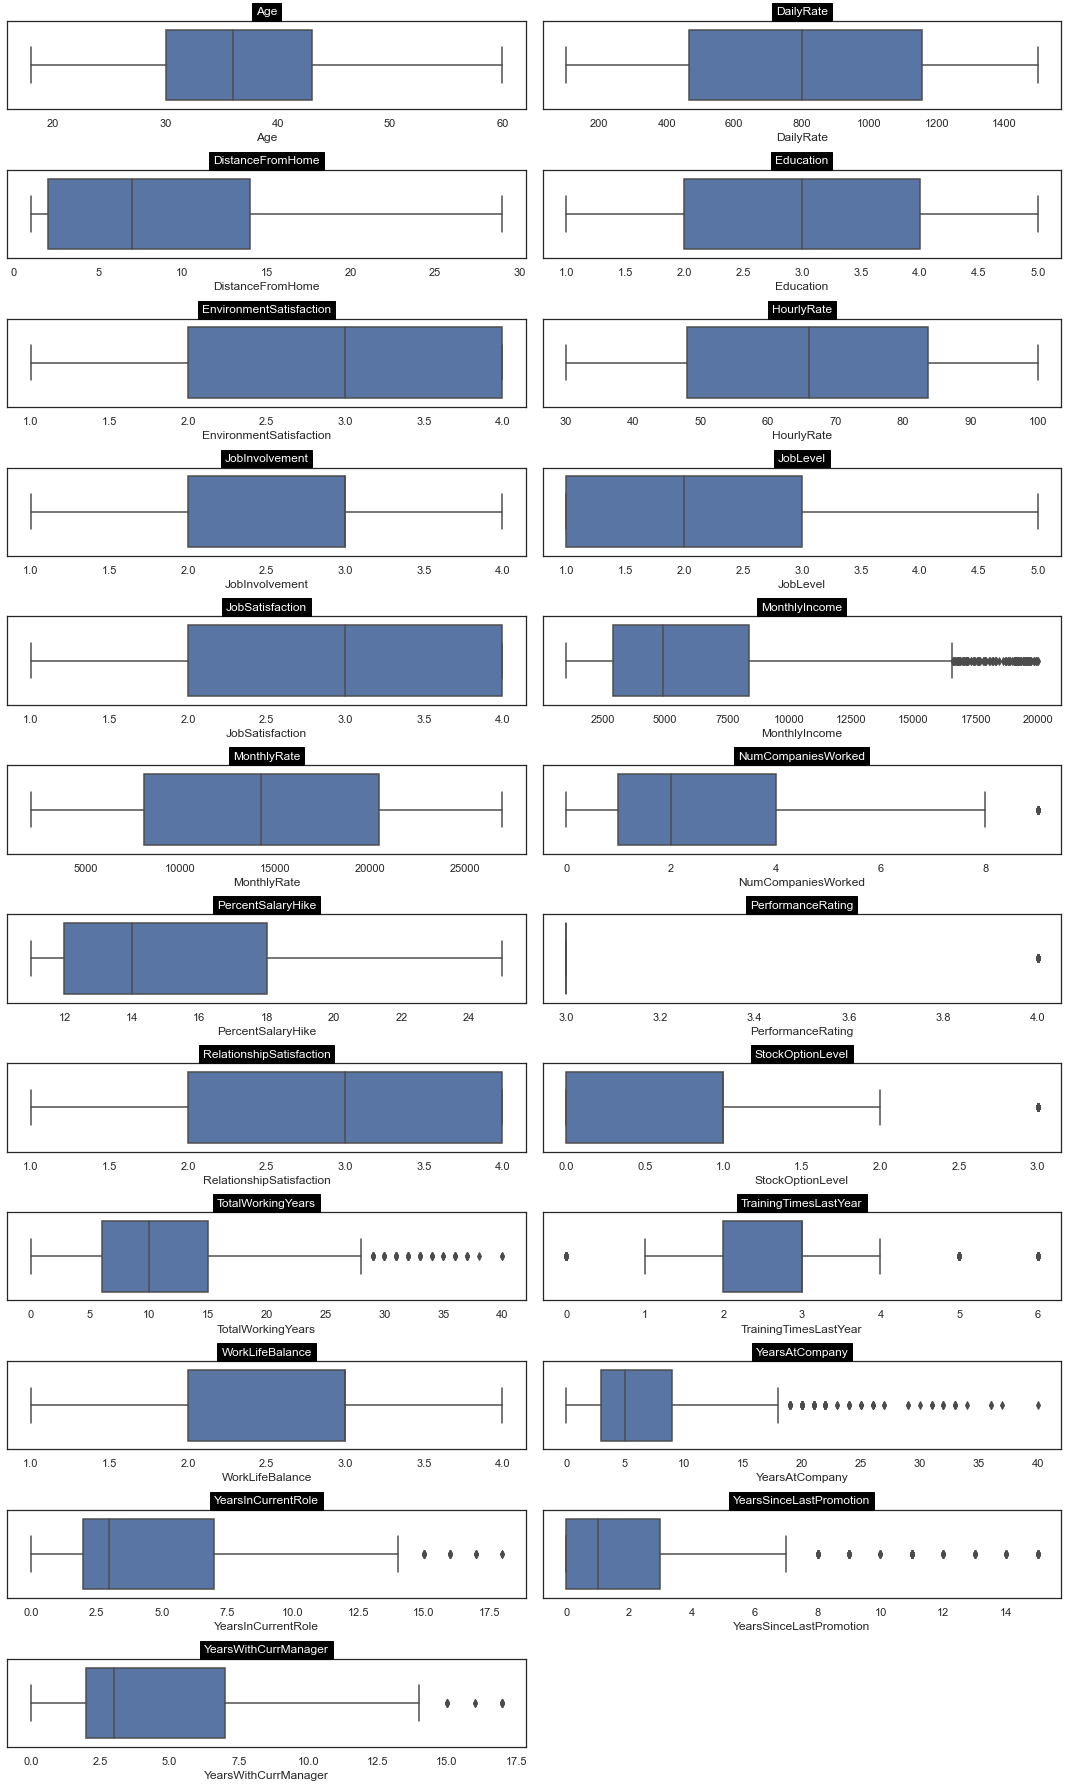

In [469]:
plt.figure(figsize = (15,25))
for numb, i in enumerate(num):
    plt.subplot(12,2, numb +1)
    sns.boxplot(x = i, data = HR_data)
    plt.title(i,backgroundcolor='black',color='white',fontsize=12)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

### Attrition by JobLevel

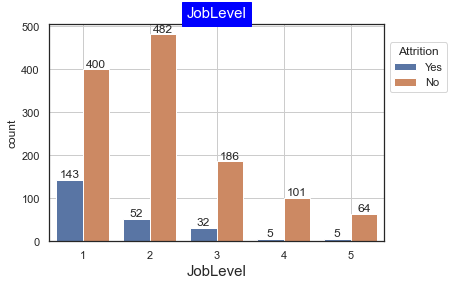

           Percentage (Attrition = Yes)  Percentage (Attrition = No)
Job Level                                                           
1                                 60.34                        32.44
2                                 21.94                        39.09
3                                 13.50                        15.09
5                                  2.11                         5.19
4                                  2.11                         8.19


In [470]:
plot = sns.countplot(x = HR_data["JobLevel"], hue = "Attrition", data = HR_data)
for container in plot.containers:
    plot.bar_label(container)
plt.title('JobLevel',backgroundcolor='blue',color='white',fontsize=15)
plt.xlabel('JobLevel',fontsize=15)
legend = plt.legend(title="Attrition", loc='center left', bbox_to_anchor=(1, 0.8))
plt.grid()
plt.show()

attrition_yes_data = HR_data[HR_data["Attrition"] == "Yes"]
attrition_no_data = HR_data[HR_data["Attrition"]=="No"]
job_level_yes_counts = attrition_yes_data["JobLevel"].value_counts()
job_level_no_counts = attrition_no_data["JobLevel"].value_counts()
job_level_Yes_percentages = (job_level_yes_counts / job_level_yes_counts.sum()) * 100
job_level_No_percentages = (job_level_no_counts / job_level_no_counts.sum()) * 100
#print(f"Percentage of Job Levels when Attrition is 'Yes':")
#for job_level, percentage in job_level_Yes_percentages.items():
#    print(f"Job Level {job_level}: {percentage:.2f}%")

#print(f"\nPercentage of Job Levels when Attrition is 'No':")
#for job_level, percentage in job_level_No_percentages.items():
#    print(f"Job Level {job_level}: {percentage:.2f}%")
    
df_yes = pd.DataFrame({'Job Level': job_level_Yes_percentages.index, 'Percentage (Attrition = Yes)': job_level_Yes_percentages.values})
df_no = pd.DataFrame({'Job Level': job_level_No_percentages.index, 'Percentage (Attrition = No)': job_level_No_percentages.values})

# Merge DataFrames
result_df = df_yes.merge(df_no, on='Job Level', how='outer')
result_df = result_df.fillna(0)  # Replace NaN values with 0 if any level is only present for one Attrition value

result_round = (round(result_df,2))
result_index = result_round.set_index("Job Level")
print(result_index)

<Figure size 360x720 with 0 Axes>

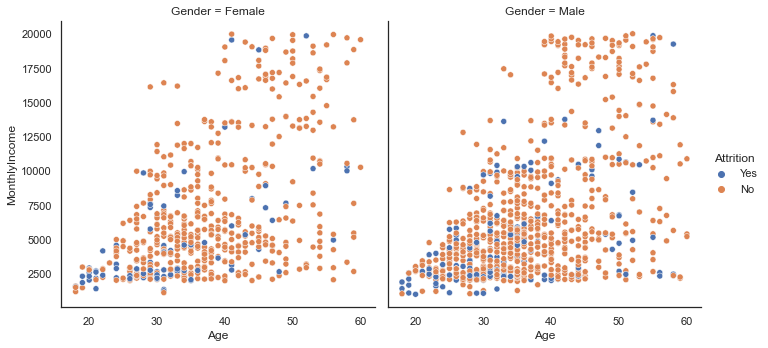

In [471]:
plt.figure(figsize=(5,10))
g =sns.relplot(data=HR_data, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 360x720 with 0 Axes>

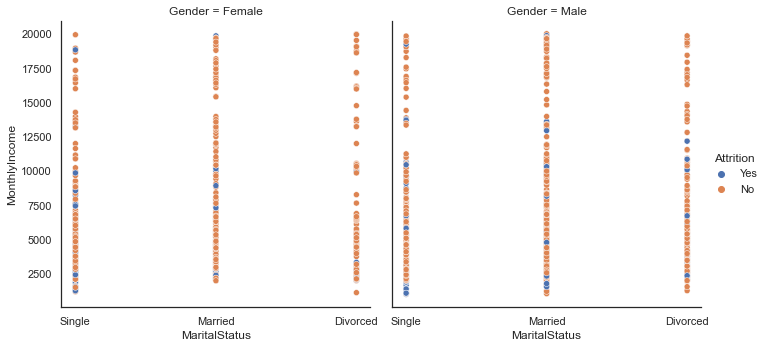

In [472]:
plt.figure(figsize=(5,10))
g =sns.relplot(data=HR_data, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 360x720 with 0 Axes>

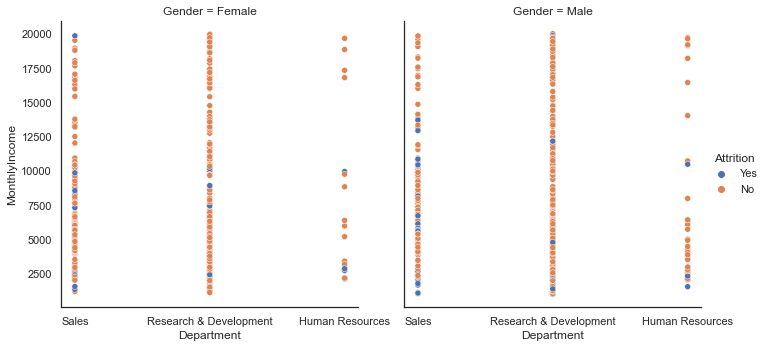

In [473]:
plt.figure(figsize=(5,10))
g =sns.relplot(data=HR_data, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 360x720 with 0 Axes>

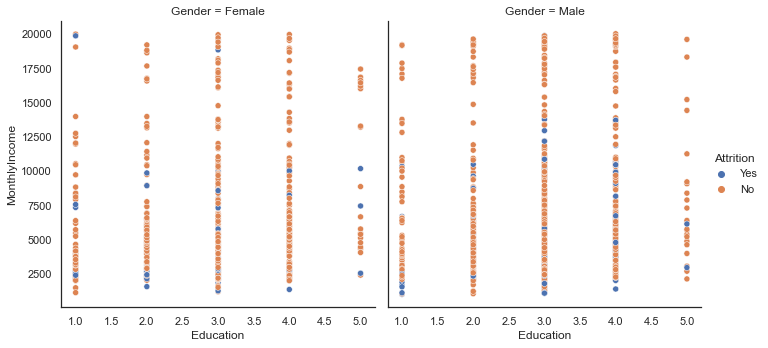

In [474]:
plt.figure(figsize=(5,10))
g =sns.relplot(data=HR_data, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

C:\Users\rakes\AppData\Local\Temp\ipykernel_20288\1640488924.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


<Figure size 576x432 with 0 Axes>

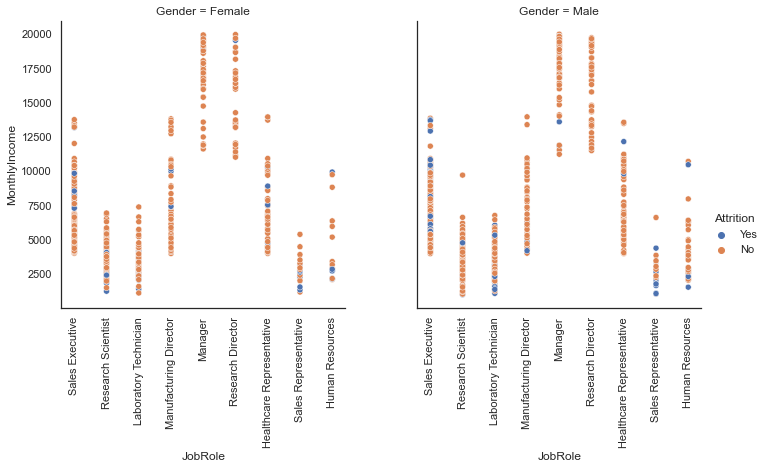

In [475]:
plt.figure(figsize=(8,6))
ax=sns.relplot(data=HR_data, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90 
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
plt.xticks(rotation=90)
plt.show()

<Figure size 360x720 with 0 Axes>

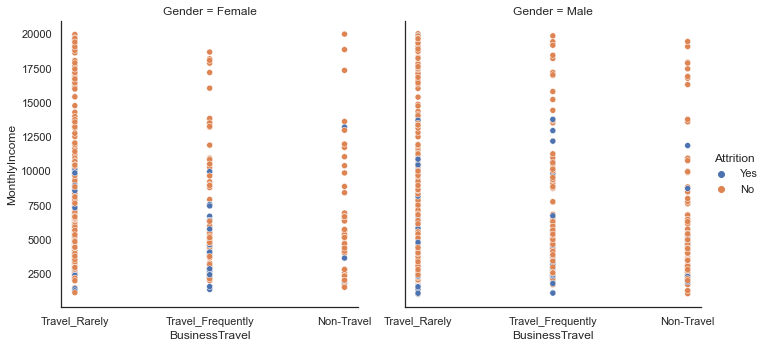

In [476]:
plt.figure(figsize=(5,10))
sns.relplot(data=HR_data, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
#plt.xticks(rotation=90)
plt.show()

In [477]:
HR_data_copy = HR_data.copy()

Converting the categorical variables into numirical variables

In [478]:
label_encoder = LabelEncoder()
HR_data_copy["Attrition"] = label_encoder.fit_transform(HR_data["Attrition"])
HR_data_copy["OverTime"] = label_encoder.fit_transform(HR_data["OverTime"])
HR_data_copy["Gender"] = label_encoder.fit_transform(HR_data["Gender"])

In [479]:
HR_data_copy=pd.get_dummies(HR_data_copy, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

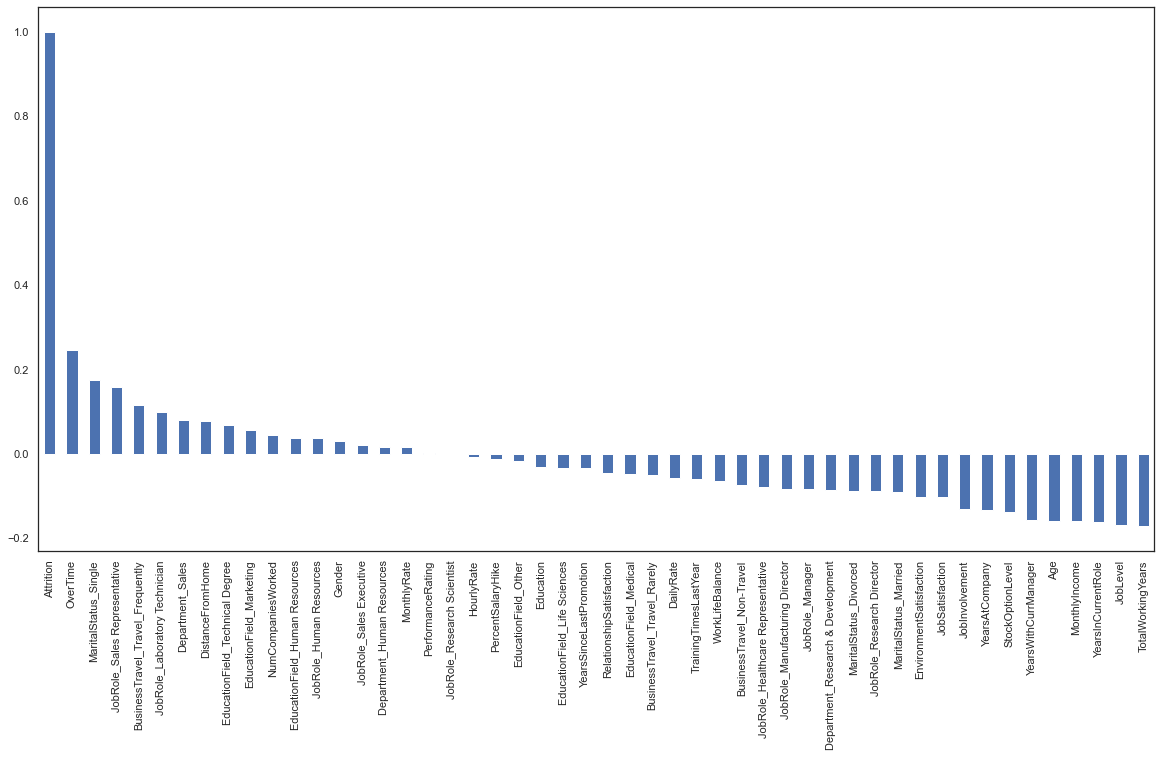

In [480]:
plt.figure(figsize=(20,10))
correlations=HR_data_copy.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');


In [481]:
corr = HR_data_copy.corr(method = "spearman")
corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.171214,0.007290,-0.019291,0.204937,0.009820,-0.036088,0.028858,0.034456,0.489618,...,-0.141417,0.284270,0.053102,0.184877,-0.152827,-0.001102,-0.174193,0.033910,0.077494,-0.113026
Attrition,-0.171214,1.000000,-0.056970,0.079248,-0.030346,-0.096486,0.029453,-0.006692,-0.119496,-0.190370,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
DailyRate,0.007290,-0.056970,1.000000,-0.002754,-0.013607,0.018961,-0.011415,0.023511,0.042469,0.003816,...,-0.006764,-0.013485,-0.005780,0.000897,-0.002829,-0.000181,0.005845,0.037104,0.040180,-0.076012
DistanceFromHome,-0.019291,0.079248,-0.002754,1.000000,0.015708,-0.010401,0.004387,0.020446,0.034430,0.022148,...,0.018464,-0.049064,-0.003774,-0.018166,-0.016738,0.044678,-0.005625,0.009059,0.017019,-0.026259
Education,0.204937,-0.030346,-0.013607,0.015708,1.000000,-0.027625,-0.009903,0.014432,0.037231,0.107419,...,-0.064955,0.025893,-0.008335,0.046079,0.004425,0.051082,-0.083289,-0.005427,-0.001209,0.006131
EnvironmentSatisfaction,0.009820,-0.096486,0.018961,-0.010401,-0.027625,1.000000,0.001863,-0.052380,-0.015301,-0.000192,...,0.000764,0.011842,0.059655,-0.046003,0.003960,-0.024693,-0.001975,0.018695,-0.028464,0.013736
Gender,-0.036088,0.029453,-0.011415,0.004387,-0.009903,0.001863,1.000000,-0.000278,0.022468,-0.050875,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
HourlyRate,0.028858,-0.006692,0.023511,0.020446,0.014432,-0.052380,-0.000278,1.000000,0.043884,-0.033876,...,0.017167,0.013660,-0.013724,-0.025475,0.019262,-0.012116,-0.018345,-0.005925,0.035371,-0.032502
JobInvolvement,0.034456,-0.119496,0.042469,0.034430,0.037231,-0.015301,0.022468,0.043884,1.000000,-0.018424,...,-0.019011,0.016936,-0.024833,0.016192,0.044358,-0.010484,-0.022248,0.024959,0.022918,-0.046740
JobLevel,0.489618,-0.190370,0.003816,0.022148,0.107419,-0.000192,-0.050875,-0.033876,-0.018424,1.000000,...,-0.386977,0.428373,0.188223,0.348861,-0.439853,0.251200,-0.254342,0.041253,0.050213,-0.090430


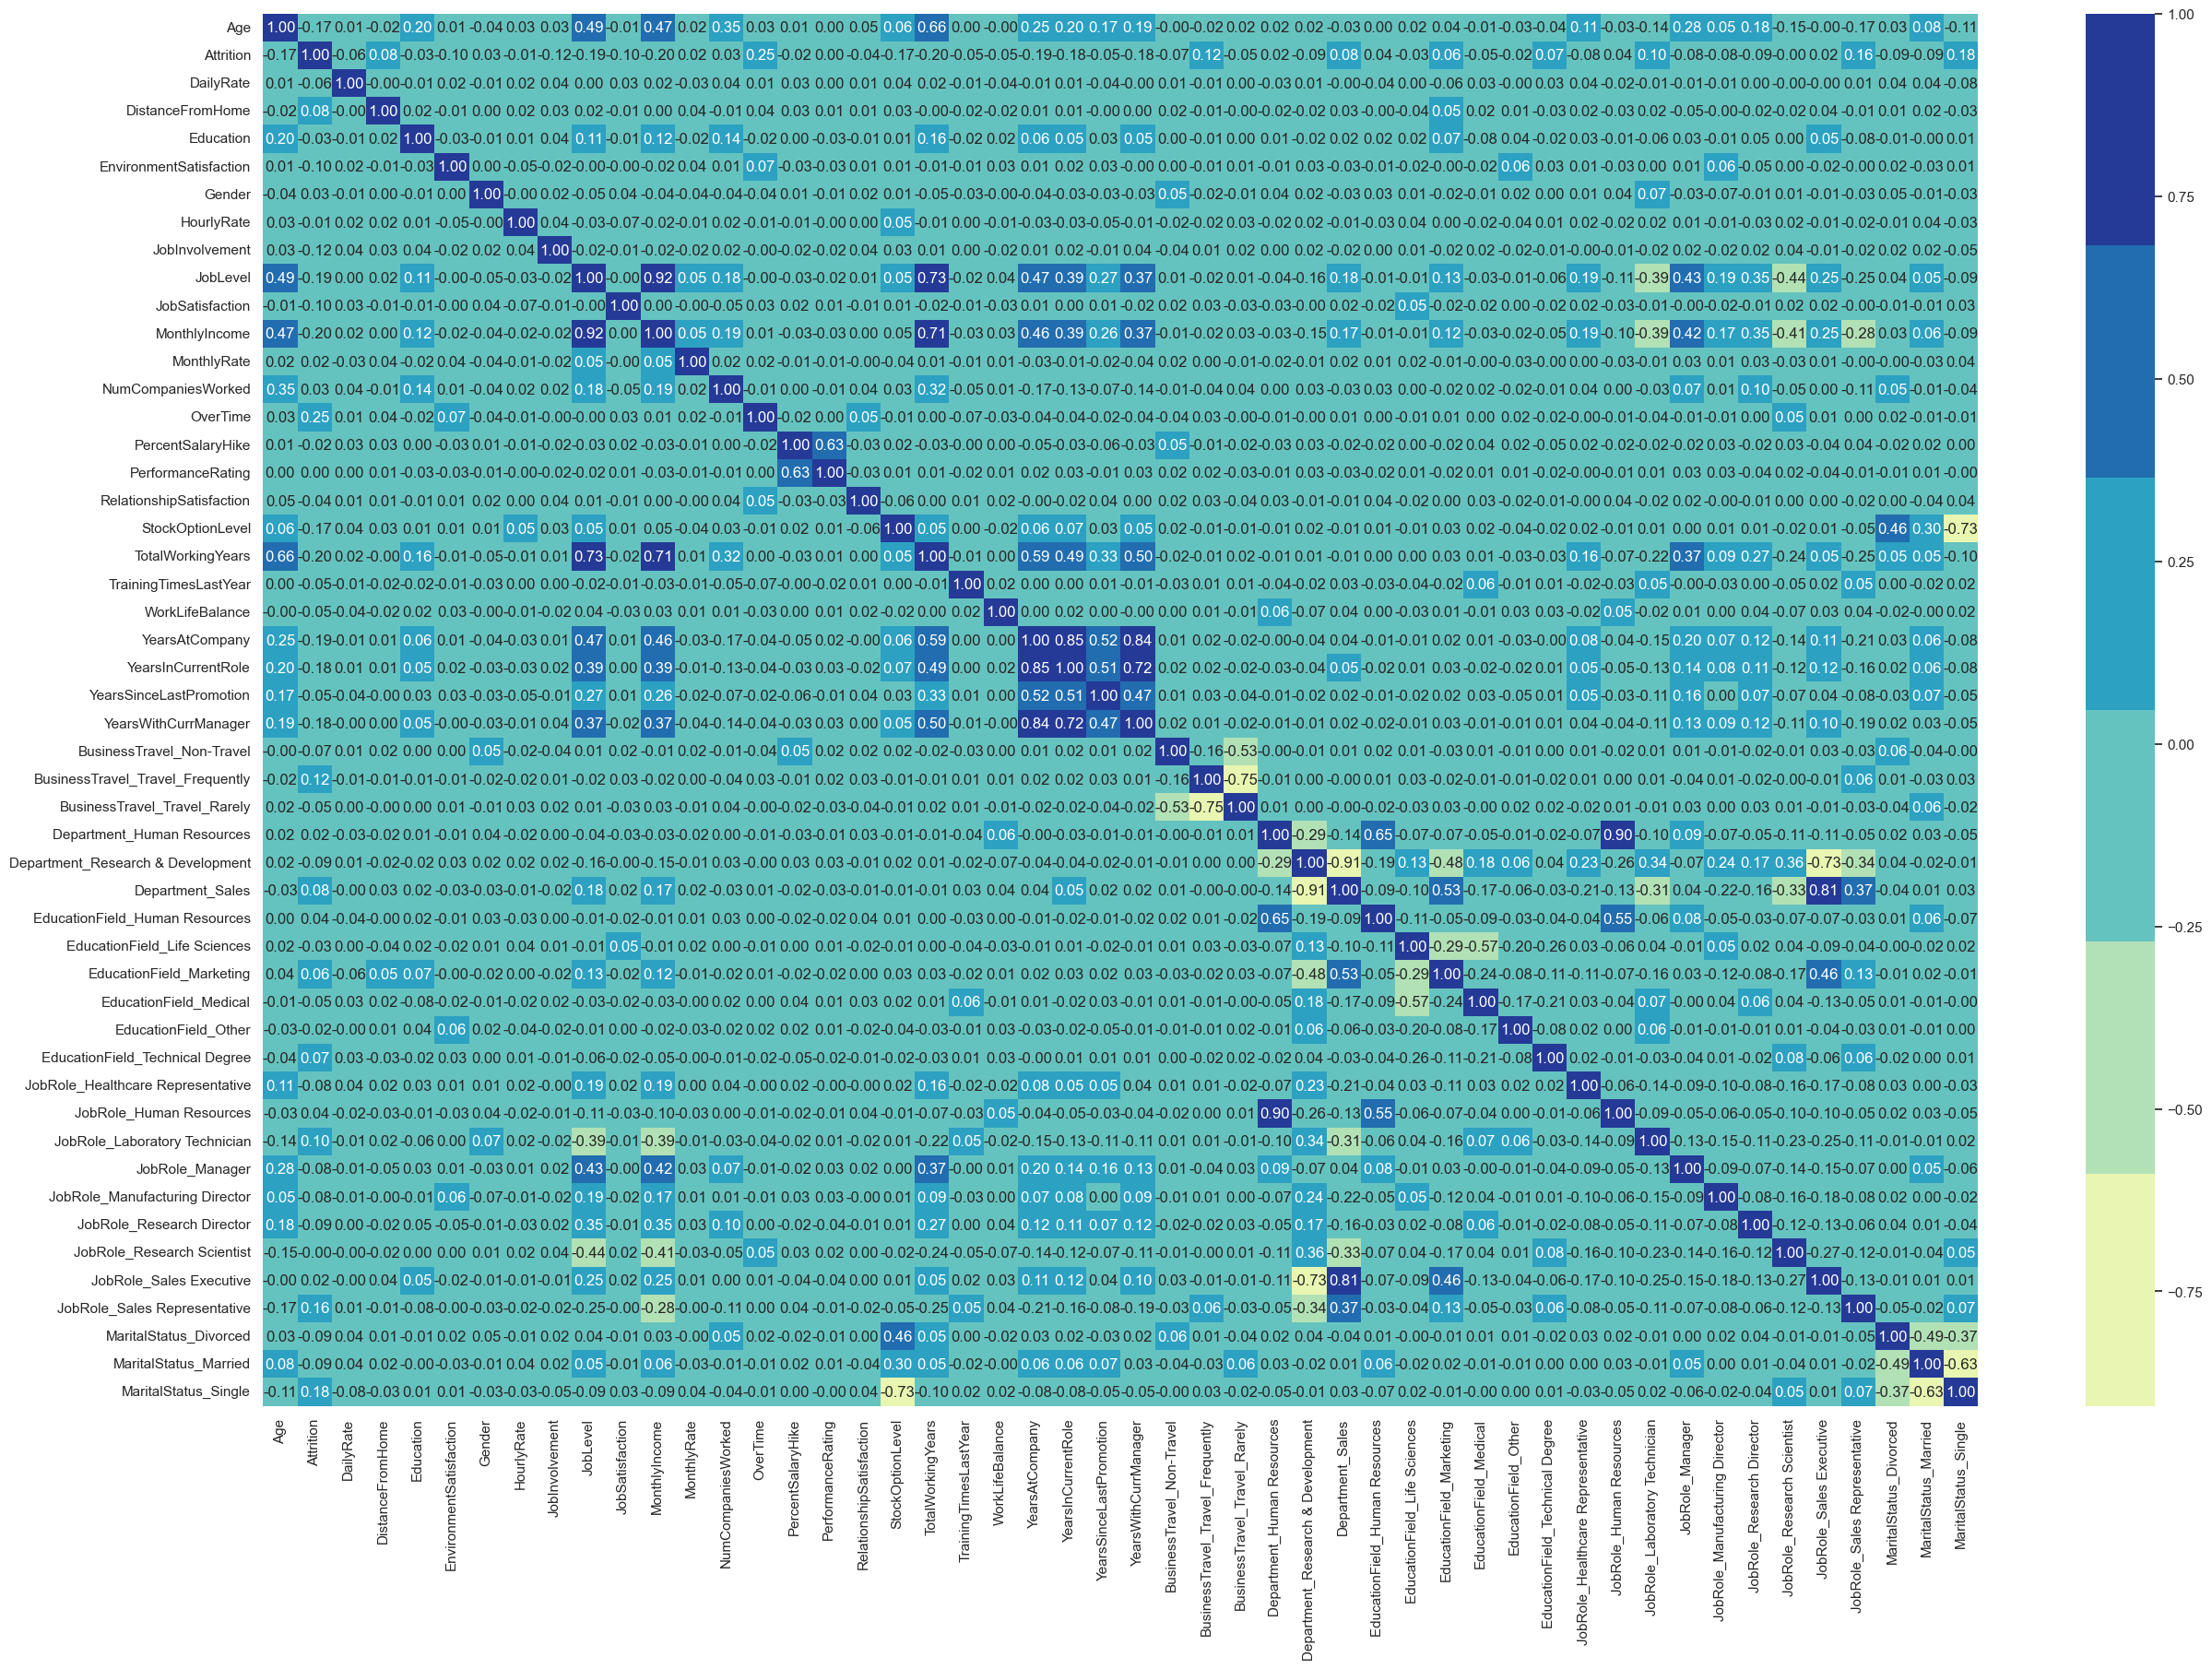

In [482]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(style="white")
custom_palette = sns.color_palette("YlGnBu")
plt.figure(figsize=(30, 20), dpi = 100)
sns.heatmap(corr,annot = True,fmt = ".2f",cmap=custom_palette)
plt.show()

In [483]:
HR_data2_copy= HR_data.copy()
Stats = HR_data.describe(include = "int64")
corr = HR_data2_copy.corr(method = "spearman")
corr

C:\Users\rakes\AppData\Local\Temp\ipykernel_20288\3964418338.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = HR_data2_copy.corr(method = "spearman")


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.007290,-0.019291,0.204937,0.009820,0.028858,0.034456,0.489618,-0.005185,0.471902,...,0.000093,0.046063,0.056633,0.656896,0.000316,-0.003707,0.251686,0.197978,0.173647,0.194818
DailyRate,0.007290,1.000000,-0.002754,-0.013607,0.018961,0.023511,0.042469,0.003816,0.027829,0.016260,...,0.000624,0.009685,0.038514,0.020951,-0.011339,-0.040352,-0.009778,0.007208,-0.037631,-0.004717
DistanceFromHome,-0.019291,-0.002754,1.000000,0.015708,-0.010401,0.020446,0.034430,0.022148,-0.013078,0.002512,...,0.011320,0.005852,0.030190,-0.002912,-0.024848,-0.020402,0.010513,0.013708,-0.004685,0.004448
Education,0.204937,-0.013607,0.015708,1.000000,-0.027625,0.014432,0.037231,0.107419,-0.005175,0.120028,...,-0.025081,-0.013173,0.013794,0.162177,-0.023749,0.017350,0.064196,0.054567,0.032203,0.051292
EnvironmentSatisfaction,0.009820,0.018961,-0.010401,-0.027625,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,-0.015163,...,-0.029160,0.005353,0.009826,-0.013882,-0.011659,0.027169,0.008425,0.020140,0.026082,-0.001732
HourlyRate,0.028858,0.023511,0.020446,0.014432,-0.052380,1.000000,0.043884,-0.033876,-0.068340,-0.019762,...,-0.002185,0.000259,0.050543,-0.012072,0.000292,-0.010003,-0.029032,-0.034016,-0.052412,-0.013811
JobInvolvement,0.034456,0.042469,0.034430,0.037231,-0.015301,0.043884,1.000000,-0.018424,-0.012148,-0.024552,...,-0.024733,0.037857,0.034464,0.006444,0.002014,-0.019889,0.013836,0.015548,-0.008307,0.037397
JobLevel,0.489618,0.003816,0.022148,0.107419,-0.000192,-0.033876,-0.018424,1.000000,-0.000852,0.920429,...,-0.018608,0.011311,0.047786,0.734678,-0.019729,0.040466,0.472283,0.391085,0.269096,0.370889
JobSatisfaction,-0.005185,0.027829,-0.013078,-0.005175,-0.002993,-0.068340,-0.012148,-0.000852,1.000000,0.004881,...,0.006979,-0.014679,0.012785,-0.015875,-0.011681,-0.029781,0.012280,0.000531,0.007497,-0.016772
MonthlyIncome,0.471902,0.016260,0.002512,0.120028,-0.015163,-0.019762,-0.024552,0.920429,0.004881,1.000000,...,-0.026999,0.003885,0.045852,0.710024,-0.034847,0.030759,0.464315,0.394712,0.264599,0.365386


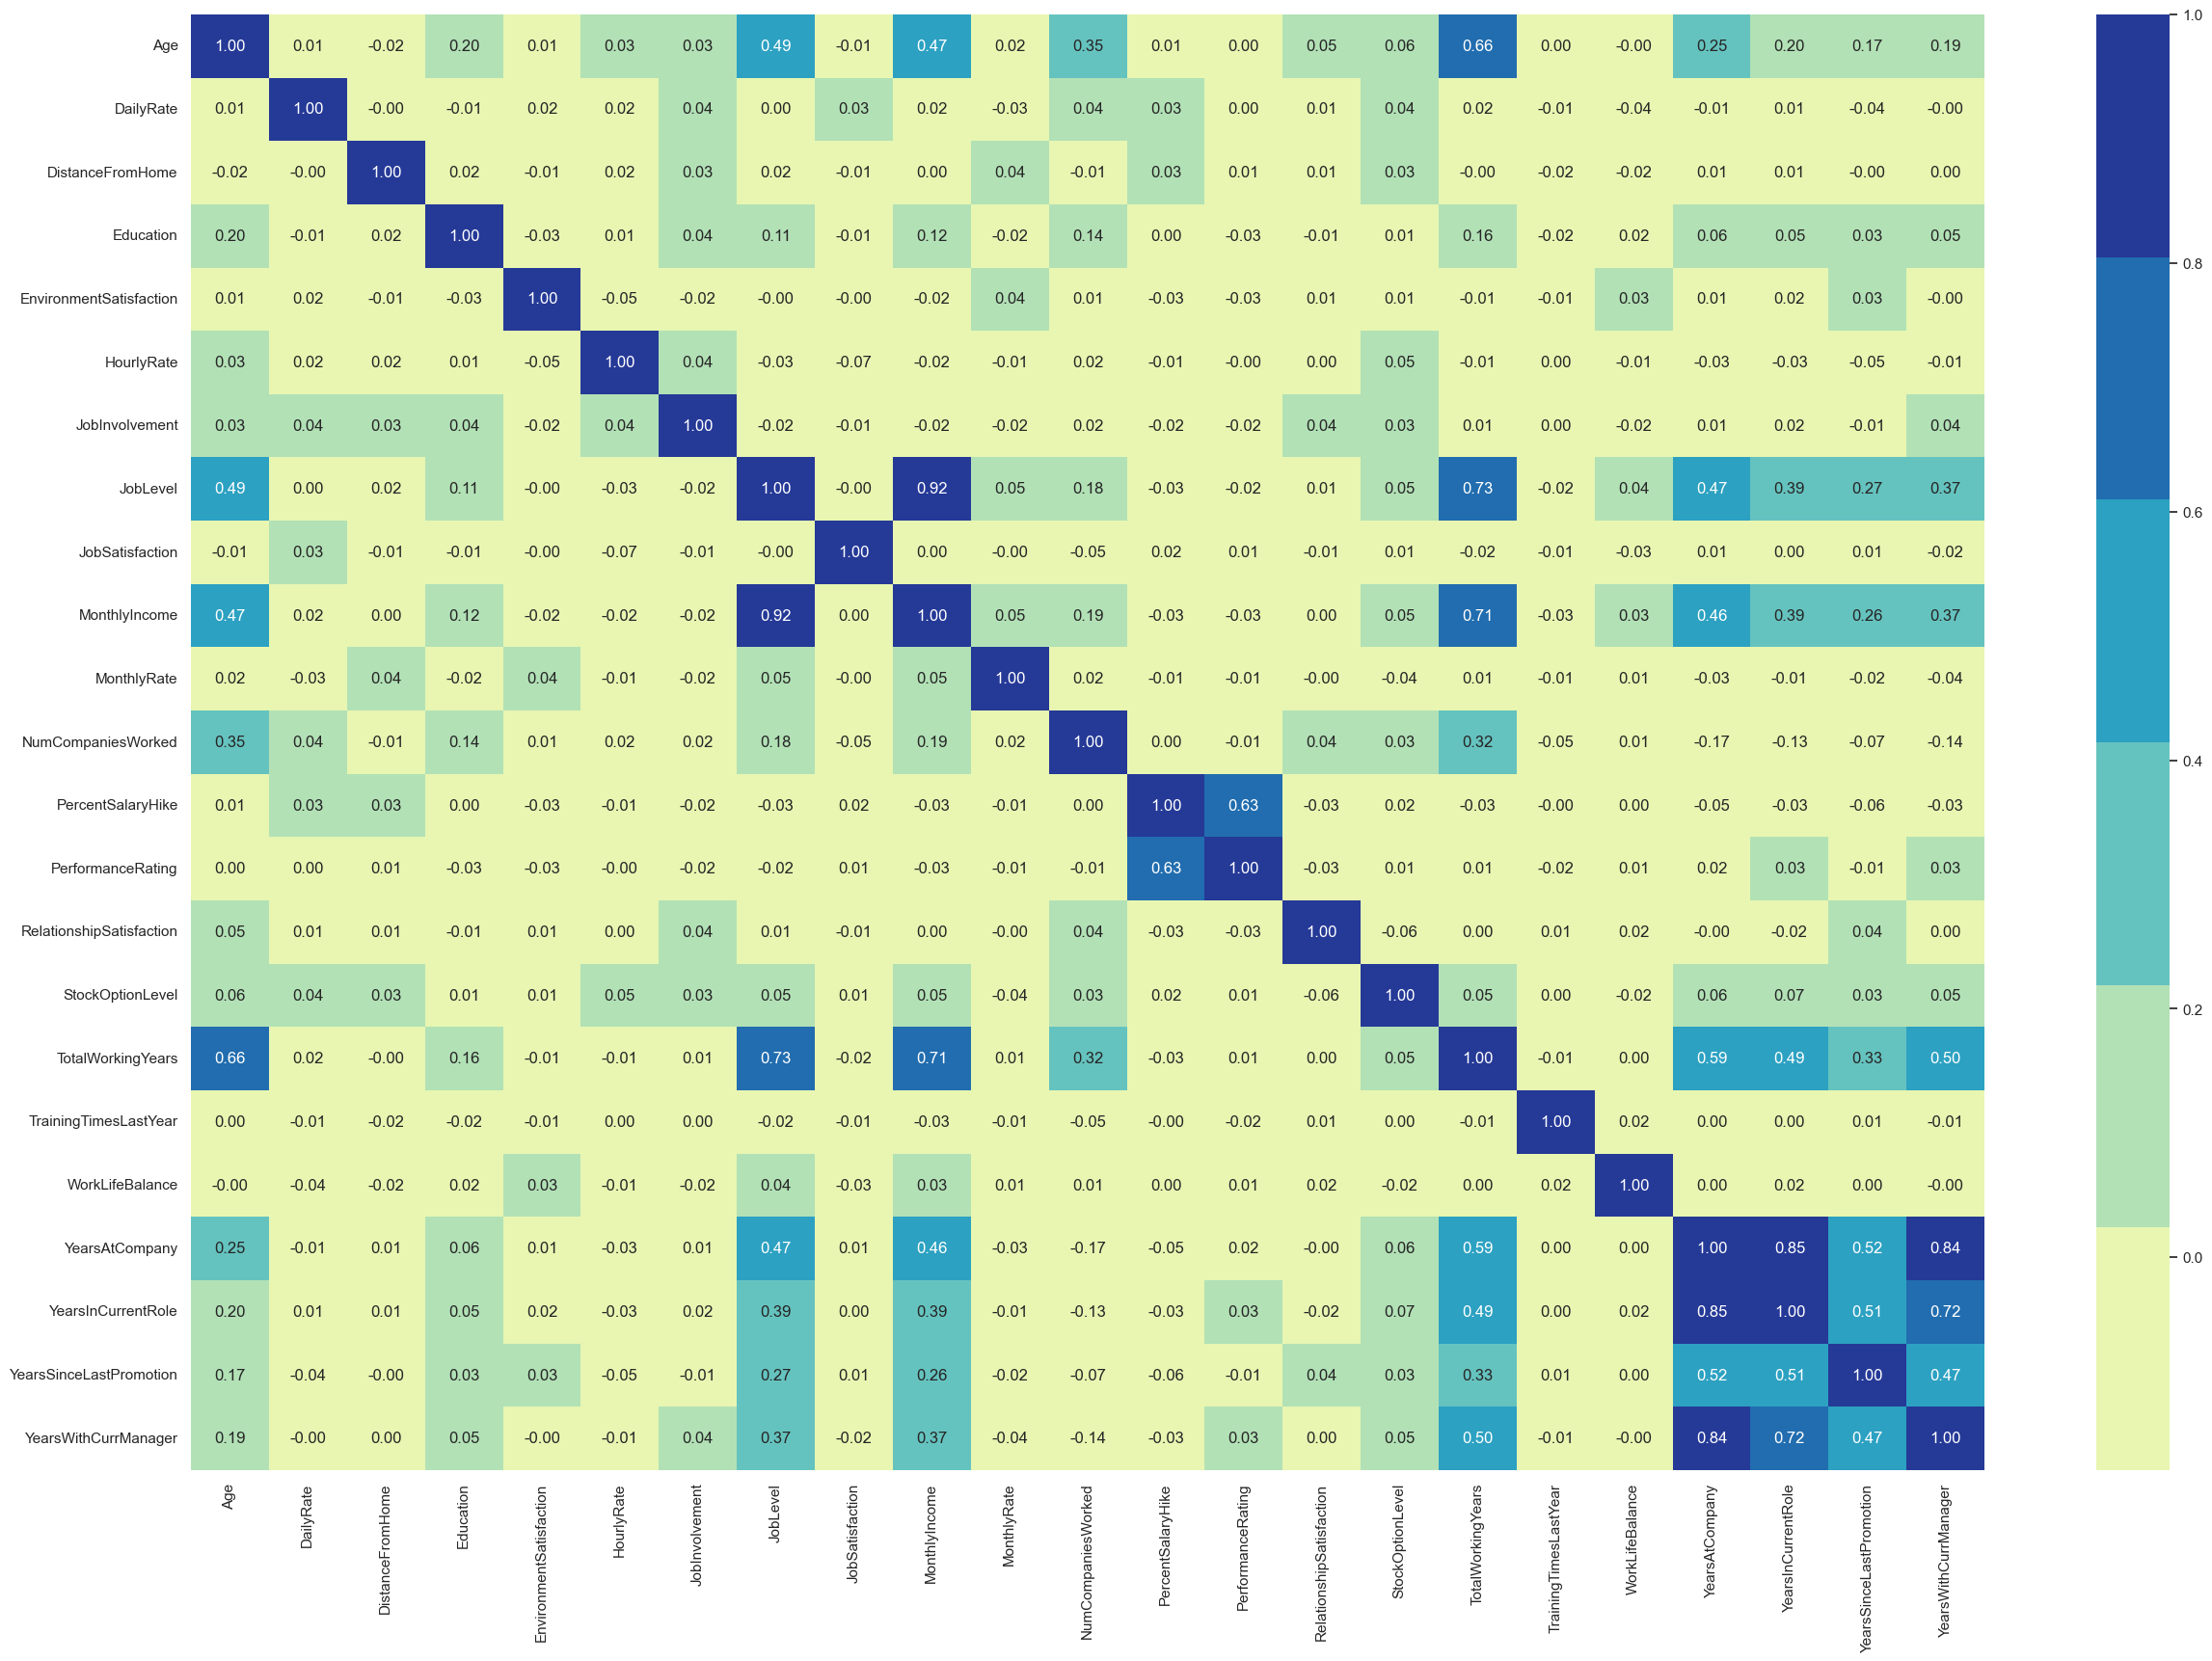

In [484]:
plt.figure(figsize=(30, 20), dpi = 100)
custom_palette = sns.color_palette("YlGnBu")
sns.heatmap(corr,annot = True,fmt = ".2f",cmap=custom_palette)

plt.show()

***We can see that Monthly Income and Job level is high Correlated***

***Also Year at company, year at current role, year since last promotion and year with current manager***

**Hypothesis testing**

In [485]:
contingency_table = pd.crosstab(HR_data["Attrition"], HR_data["Gender"])
contingency_table

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [486]:
p_value = chi2_contingency(contingency_table)
print(p_value)

Chi2ContingencyResult(statistic=1.1169671241970975, pvalue=0.29057244902890855, dof=1, expected_freq=array([[493.2, 739.8],
       [ 94.8, 142.2]]))


In [487]:
sample_data = HR_data.sample(n=100,random_state =50)
sample_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
264,28,Yes,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,Male,...,3,3,0,5,5,1,0,0,0,0
1116,55,No,Travel_Rarely,685,Sales,26,5,Marketing,3,Male,...,4,3,1,36,3,3,36,6,2,13
1354,56,Yes,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,Male,...,3,4,0,5,3,3,4,2,1,0
1143,45,No,Non-Travel,336,Sales,26,3,Marketing,1,Male,...,3,1,1,10,2,3,10,7,4,5
349,29,No,Non-Travel,746,Sales,2,3,Life Sciences,4,Male,...,3,1,1,4,3,2,4,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,44,Yes,Travel_Frequently,920,Research & Development,24,3,Life Sciences,4,Male,...,4,4,1,19,0,1,1,0,0,0
246,33,No,Travel_Rarely,832,Research & Development,5,4,Life Sciences,3,Female,...,3,3,1,2,2,2,2,2,0,2
312,31,No,Travel_Rarely,192,Research & Development,2,4,Life Sciences,3,Male,...,3,2,1,3,2,1,2,2,2,2
316,49,No,Travel_Rarely,1091,Research & Development,1,2,Technical Degree,3,Female,...,3,4,0,25,2,3,7,1,0,7


In [488]:
def predict_attrition(rows):
    if rows["Age"]<=40 and rows["YearsAtCompany"]<=5:
        return "Yes"
    elif rows["YearsAtCompany"]<=5 and rows["WorkLifeBalance"]<=3:
        return "Yes"
    elif rows["WorkLifeBalance"]<=3 and rows["Attrition"]=="Yes":
        return "Yes"
    else:
        return "No"
sample_data["PredictedAttrition"] = sample_data.apply(predict_attrition, axis=1)  

In [489]:
sample_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PredictedAttrition
264,28,Yes,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,Male,...,3,0,5,5,1,0,0,0,0,Yes
1116,55,No,Travel_Rarely,685,Sales,26,5,Marketing,3,Male,...,3,1,36,3,3,36,6,2,13,No
1354,56,Yes,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,Male,...,4,0,5,3,3,4,2,1,0,Yes
1143,45,No,Non-Travel,336,Sales,26,3,Marketing,1,Male,...,1,1,10,2,3,10,7,4,5,No
349,29,No,Non-Travel,746,Sales,2,3,Life Sciences,4,Male,...,1,1,4,3,2,4,3,0,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,44,Yes,Travel_Frequently,920,Research & Development,24,3,Life Sciences,4,Male,...,4,1,19,0,1,1,0,0,0,Yes
246,33,No,Travel_Rarely,832,Research & Development,5,4,Life Sciences,3,Female,...,3,1,2,2,2,2,2,0,2,Yes
312,31,No,Travel_Rarely,192,Research & Development,2,4,Life Sciences,3,Male,...,2,1,3,2,1,2,2,2,2,Yes
316,49,No,Travel_Rarely,1091,Research & Development,1,2,Technical Degree,3,Female,...,4,0,25,2,3,7,1,0,7,No


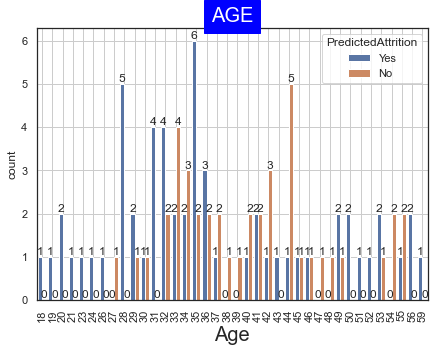

In [490]:
    plt.figure(figsize =(7,5))

    plot=sns.countplot(x= "Age",data= sample_data,hue="PredictedAttrition")
    for container in plot.containers:
        plot.bar_label(container)  


plt.title("AGE",backgroundcolor='Blue',color='White',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Age",fontsize=20)
plt.grid()
plt.show()

<AxesSubplot: xlabel='YearsAtCompany', ylabel='Age'>

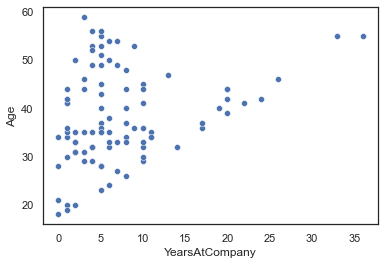

In [491]:
sns.scatterplot(x=sample_data["YearsAtCompany"], data = sample_data,y = sample_data["Age"])

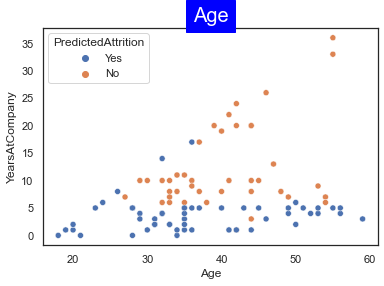

In [492]:
sns.scatterplot(x = "Age", y = "YearsAtCompany",data = sample_data, hue ="PredictedAttrition" )
plt.title("Age",backgroundcolor='Blue',color='White',fontsize=20)
plt.show()

In [493]:
contingency_table = pd.crosstab(sample_data["Attrition"], sample_data["WorkLifeBalance"])
contingency_table


WorkLifeBalance,1,2,3,4
Attrition,,,,
No,7,19,51,7
Yes,3,2,10,1


In [494]:
p_value = chi2_contingency(contingency_table)
p_value  = 0.5332091719391048
print(p_value)
alpha  = 0.05 # significance level
# H0 = WorkLifeBalance is a factor for attrrition
# H1 = WorkLifeBalance is not a factor for attrrition
if p_value < alpha:
    print("reject H0")
else:
    print("fail to reject H0")

0.5332091719391048
fail to reject H0


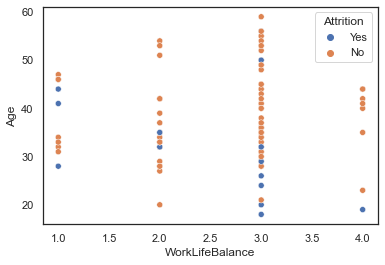

In [495]:
sns.scatterplot(x = "WorkLifeBalance", y = "Age",data =sample_data, hue = "Attrition")
plt.show()
#Here with graph we can say there is strong relationship between Work Life Balance, age and Attriation 

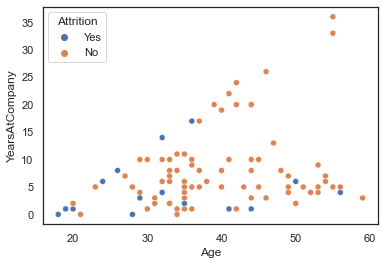

In [496]:
sns.scatterplot(x = "Age", y = "YearsAtCompany",data =sample_data, hue = "Attrition")
plt.show()

In [497]:
DF = HR_data.copy()

In [498]:
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',1)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',3)

DF['Attrition'] = DF['Attrition'].replace('Yes',1)
DF['Attrition'] = DF['Attrition'].replace('No',2)

DF['OverTime'] = DF['OverTime'].replace('Yes',1)
DF['OverTime'] = DF['OverTime'].replace('No',2)

DF['Gender'] = DF['Gender'].replace("Male",1)
DF['Gender'] = DF['Gender'].replace("Female",2)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',1)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',3)

DF['Department'] = DF['Department'].replace('Sales',1)
DF['Department'] = DF['Department'].replace('Human Resources',2)
DF['Department'] = DF['Department'].replace('Research & Development',3)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',1)
DF['EducationField'] = DF['EducationField'].replace('Medical',2)
DF['EducationField'] = DF['EducationField'].replace('Marketing',3)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',1)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',2)
DF['EducationField'] = DF['EducationField'].replace('Other',3)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',1)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',2)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',3)
DF['JobRole'] = DF['JobRole'].replace('Manager',1)
DF['JobRole'] = DF['JobRole'].replace('Research Director',2)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',3)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',1)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',2)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',3)

In [499]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [500]:
#Normalizing 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
#DF1 = DF.drop(columns=["Attrition"])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

x = pd.DataFrame(norm_df.drop(columns='Attrition'))
y = pd.DataFrame(norm_df["Attrition"]).values.reshape(-1, 1)

In [501]:
x_train,x_test,y_train,y_test = train_test_split (x ,y ,test_size = 0.2 , random_state = 0)

In [502]:
from imblearn.over_sampling import SMOTE
# Create a SMOTE object
oversampler=SMOTE(random_state=0)
# Apply SMOTE to the training data
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

## Logistic Regression

'''Logistic Regression is a statistical and machine learning model used for binary classification tasks, where the goal is to predict one of two possible outcomes (e.g., yes/no, 1/0, true/false). It's a widely used and well-understood algorithm due to its simplicity and effectiveness. Here are some key points about Logistic Regression:'''

In [503]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
model=LogisticRegression(C=1000,max_iter=10000)
# Train the model on the oversampled training data
model.fit(smote_train, smote_target)
# Make predictions on the test set
y_pred_lg = model.predict(x_test)
# Calculate accuracy
print ('accuracy',metrics.accuracy_score(y_test, y_pred_lg))


accuracy 0.7687074829931972


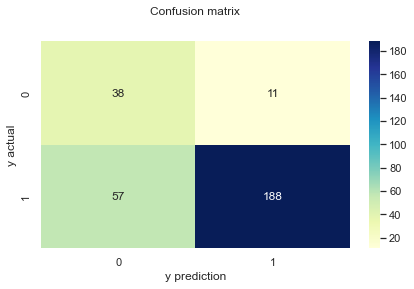

              precision    recall  f1-score   support

         0.0       0.40      0.78      0.53        49
         1.0       0.94      0.77      0.85       245

    accuracy                           0.77       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.85      0.77      0.79       294



In [504]:
cm = metrics.confusion_matrix(y_test,y_pred_lg)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()
from sklearn.metrics import classification_report
reports = classification_report(y_test, y_pred_lg)
print(reports)

**The classification_report provides a comprehensive summary of the performance of a classification model. It includes several important metrics for each class in a multi-class classification problem. The report is typically organized into four sections: precision, recall, F1-score, and support. Let's break down what each of these metrics means:

**Precision: Precision is a measure of how many of the predicted positive instances were actually correct. It's calculated as:

*Precision = TP / (TP + FP)

**TP (True Positives): The number of correctly predicted positive instances.
FP (False Positives): The number of instances that were predicted as positive but were actually negative.
High precision indicates that the model has a low rate of false positives, which means that when it predicts a positive class, it's likely to be correct.

**Recall (Sensitivity): Recall measures how many of the actual positive instances were correctly predicted by the model. It's calculated as:

*Recall = TP / (TP + FN)

**TP (True Positives): As defined earlier.
FN (False Negatives): The number of instances that were actually positive but were incorrectly predicted as negative.
High recall indicates that the model is good at capturing most of the positive instances, minimizing false negatives.

**F1-Score: The F1-Score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall and is especially useful when you need a single metric to evaluate the model. It's calculated as:

*F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

**The F1-Score reaches its best value at 1 and its worst score at 0.

**Support: Support is the number of actual occurrences of the class in the dataset. It provides context for the other metrics.

In [505]:
from sklearn.ensemble import RandomForestClassifier

In [506]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9795918367346939


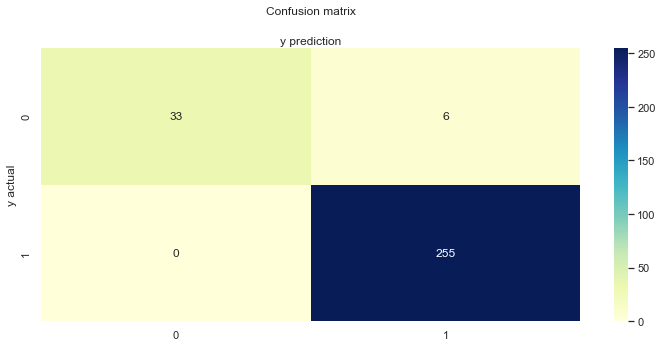

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.99      0.92      0.95       294
weighted avg       0.98      0.98      0.98       294



In [512]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()
accuracy = classification_report(y_test, y_pred)
print(accuracy)

In [515]:
seed=0
gb_params ={
    'n_estimators': 1000,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 3,
    'min_samples_leaf': 1,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0}

from sklearn.ensemble import  GradientBoostingClassifier
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(x_test)
Accuracy = metrics.accuracy_score(y_test, gb_predictions)
print(f"Accuracy: ---> {Accuracy*100:0.2f}%")

Accuracy: ---> 97.28%


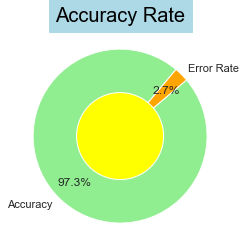

In [517]:
import matplotlib.pyplot as plt

# Calculate accuracy and error rate
accuracy = metrics.accuracy_score(y_test, gb_predictions)
error_rate = 1 - accuracy

# Create labels for the pie chart
labels = ['Accuracy', 'Error Rate']

# Create sizes for the pie chart
sizes = [accuracy, error_rate]

# Define colors for the slices
colors = ['lightgreen', 'orange']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=50,pctdistance=0.75)
circle = plt.Circle((0, 0), 0.50, fc='yellow')
fig.gca().add_artist(circle)
# Add a title
plt.title('Accuracy Rate',backgroundcolor = "lightblue", color = "black", fontsize = 20)

# Show the chart
plt.show()

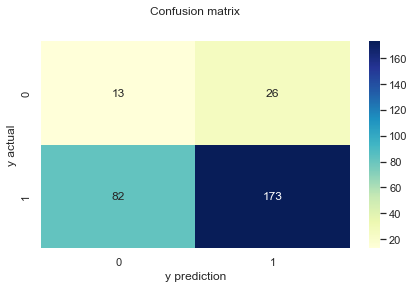

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89        39
         1.0       0.98      0.99      0.98       255

    accuracy                           0.97       294
   macro avg       0.96      0.92      0.94       294
weighted avg       0.97      0.97      0.97       294



In [518]:
cm = metrics.confusion_matrix(y_test,y_pred_lg)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_lg),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, gb_predictions))

## Summary

##### At first, we gave a complete analysis on the data and features, which are given in the text of the explanations related to the data.

##### Then, due to the Imbalanced Data Distribution, the "SMOTE" method was used to solve this problem.

##### Finally, modeling was done with three machine learning methods, and the best model with 98% accuracy was the Gradient Boosted model.